In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import sys
import os
import torch

In [2]:
ENERGY_PATH = "data/energy/"
WEATHER_PATH = "data/weather/Weather_Data_Germany.csv"

weather_data = pd.read_csv(WEATHER_PATH, sep=",")


In [3]:
weather_data.head()

,longitude,latitude,forecast_origin,time,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100
0,5.8,54.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,-2.766602,102439.914,766.03015,0.304399,11.806978,2.823900,282.04110,0.0,0.0,0.0,0.0,0.000860,15.666069,3.153420
1,5.8,53.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,-6.159180,102795.230,842.93190,0.945699,6.628730,1.767059,281.28223,0.0,0.0,0.0,0.0,0.254992,10.824787,2.401394
2,5.8,52.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,478.410160,103077.450,862.93030,0.999504,4.976940,1.899902,280.48530,0.0,0.0,0.0,0.0,0.439765,8.450895,2.586425
3,5.8,51.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,237.821290,103310.510,619.56150,0.999992,3.810944,1.201527,280.26593,0.0,0.0,0.0,0.0,0.645616,6.853557,1.614200
4,5.8,50.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,4681.780000,103456.680,385.46838,0.999992,3.689941,-0.424220,277.94235,0.0,0.0,0.0,0.0,0.361133,6.055728,-0.896704


In [4]:
# average data per hour
avg_per_h = weather_data.groupby(['time']).mean(numeric_only=True).reset_index()
avg_per_h.head()





,time,longitude,latitude,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100
0,2019-01-01 00:00:00,10.3,50.7,0.0,3360.296561,103009.967750,507.635043,0.966562,3.867164,1.065368,278.216013,0.0,0.0,0.0,0.000000,0.741971,6.545994,1.122055
1,2019-01-01 01:00:00,10.3,50.7,0.0,3360.296561,102964.489612,544.627164,0.959348,4.092345,1.116217,278.310794,0.0,0.0,0.0,0.000038,0.742205,6.838839,1.241379
2,2019-01-01 02:00:00,10.3,50.7,0.0,3360.296561,102908.208325,575.103757,0.966846,4.320050,1.223478,278.206292,0.0,0.0,0.0,0.000070,0.742254,7.183921,1.428783
3,2019-01-01 03:00:00,10.3,50.7,0.0,3360.296561,102827.034387,612.314609,0.979125,4.638074,1.222571,278.140331,0.0,0.0,0.0,0.000099,0.742272,7.660834,1.501984
4,2019-01-01 04:00:00,10.3,50.7,0.0,3360.296561,102725.913987,660.112603,0.981526,4.980449,1.055763,278.102989,0.0,0.0,0.0,0.000135,0.742255,8.147790,1.289936


In [5]:
#column where t2m is converted to celsius from kelvin
avg_per_h['t2m_C'] = avg_per_h['t2m'] - 273.15

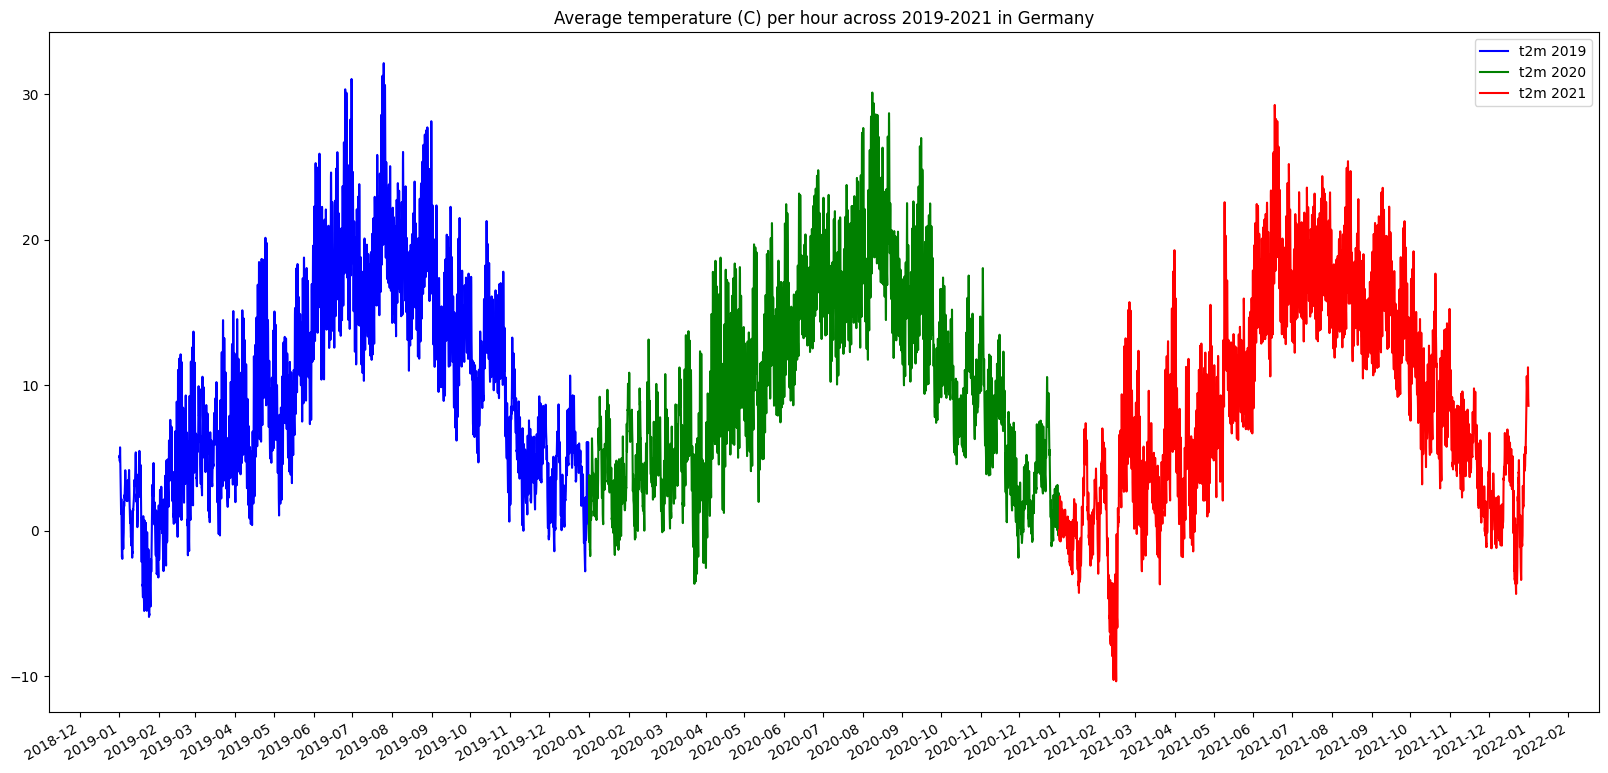

In [10]:
#plot ssr and t2m for each year separately
# add ticks on x axis for 
import matplotlib.dates as mdates

avg_per_h['time'] = pd.to_datetime(avg_per_h['time'])  # Make sure 'time' is in datetime format

plt.figure(figsize=(20, 10))

# Define colors or line styles if you want distinct appearances
colors = ['blue', 'green', 'red']
years = range(2019, 2022)

for i, year in enumerate(years):
    # Filter data for each year
    year_data = avg_per_h[avg_per_h['time'].dt.year == year]
    
    # Plot each year's data
    plt.plot(year_data['time'], year_data['t2m_C'], label=f't2m {year}', color=colors[i])

# Set x-axis major ticks to the first day of each month and format them
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Optional: Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.title("Average temperature (C) per hour across 2019-2021 in Germany")
plt.show()

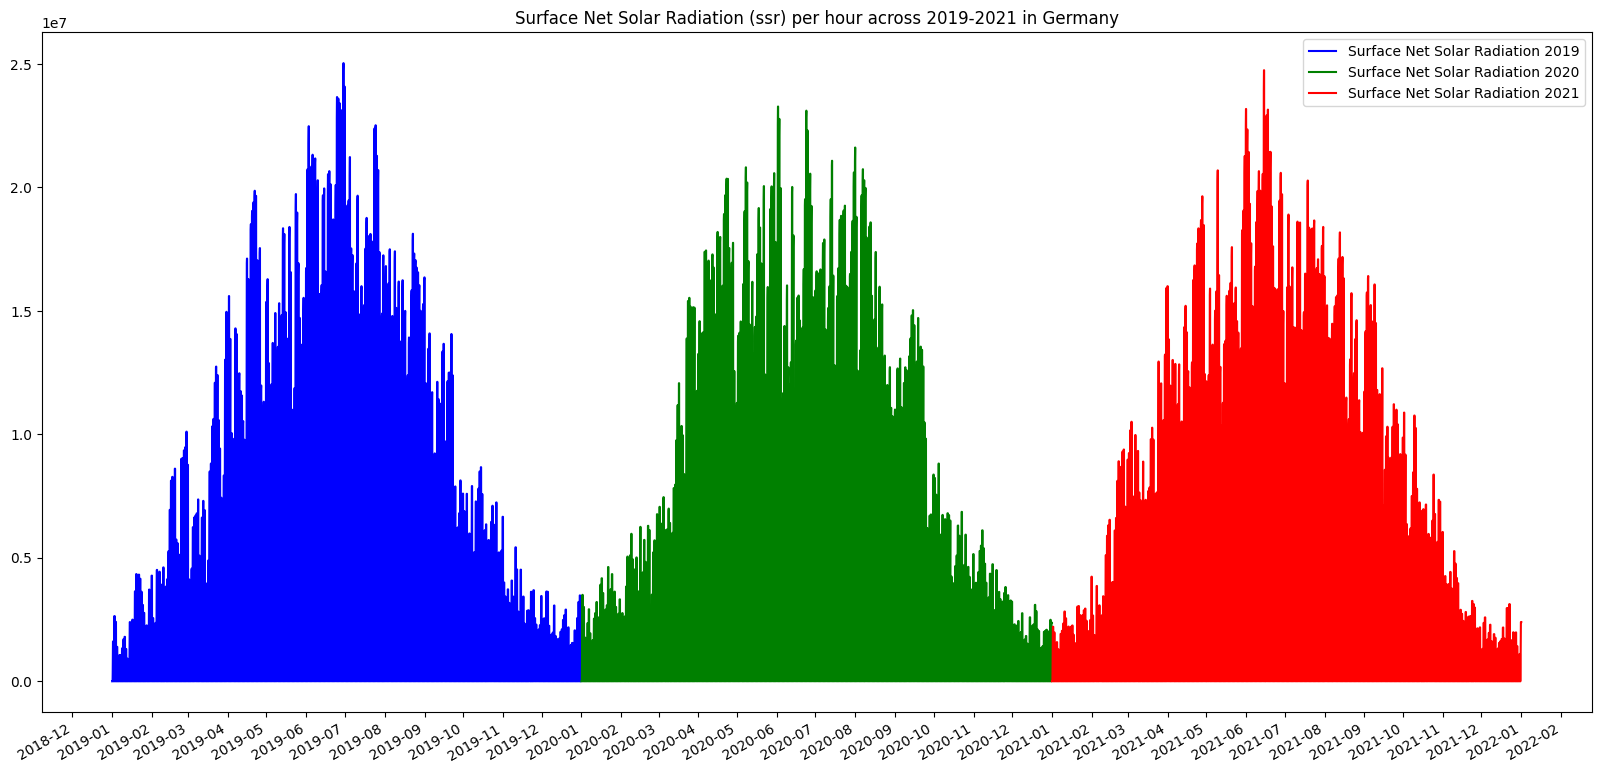

In [12]:
#same as above but for srr
avg_per_h['time'] = pd.to_datetime(avg_per_h['time'])  # Convert 'time' to datetime format

plt.figure(figsize=(20, 10))

# Define colors or line styles for visual distinction
colors = ['blue', 'green', 'red']  # Different colors for each year
years = range(2019, 2022)

for i, year in enumerate(years):
    # Filter data for each year
    year_data = avg_per_h[avg_per_h['time'].dt.year == year]
    
    # Plot 'srr' data for each year
    plt.plot(year_data['time'], year_data['ssr'], label=f'Surface Net Solar Radiation {year}', color=colors[i])

# Set x-axis major ticks to the first day of each month and format them
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Optional: Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.title("Surface Net Solar Radiation (ssr) per hour across 2019-2021 in Germany")
plt.show()

In [ ]:
# find most significant variables in data for solar energy prediction / wind energy prediction
# normalize data + further pre processing
# build model
# train small train split for debugging
# train entire model
# finde tune hyperparameters with validation set    
# test model on test set